# Crop Yield Prediction 

### Importing Libraries:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Loading, Merging and Cleaning Datasets:

In [6]:
# Loading Datasets 
pesticides_df = pd.read_csv('pesticides.csv')
rainfall_df = pd.read_csv('rainfall.csv')
temp_df = pd.read_csv('temp.csv')
yield_df = pd.read_csv('yield.csv')

# Merge datasets based on 'Year' and 'Area'
merged_df = pd.merge(pesticides_df, rainfall_df, on=['Year', 'Area'], how='inner')
merged_df = pd.merge(merged_df, temp_df, left_on=['Year', 'Area'], right_on=['year', 'country'], how='inner')
merged_df = pd.merge(merged_df, yield_df, left_on=['Year', 'Area'], right_on=['Year', 'Area'], how='inner')

# Clean Data- Remove unwanted Values.
merged_df.replace('..', np.nan, inplace=True)
merged_df.dropna(inplace=True)

# Encode categorical data
label_encoder = LabelEncoder()
merged_df['Area'] = label_encoder.fit_transform(merged_df['Area'])

# Prepare features and target
X = merged_df[['Year', 'Area', 'Value_x', 'average_rain_fall_mm_per_year', 'avg_temp']]
X.columns = ['Year', 'Area', 'Pesticides', 'Rainfall', 'Temperature']
y = merged_df['Value_y']

### Pesticides Usage:
This visualization highlights the total pesticide usage in the top 10 countries with the highest pesticide application. It provides a clear comparison of pesticide usage between these countries, allowing for easy identification of the countries with the highest pesticide usage.

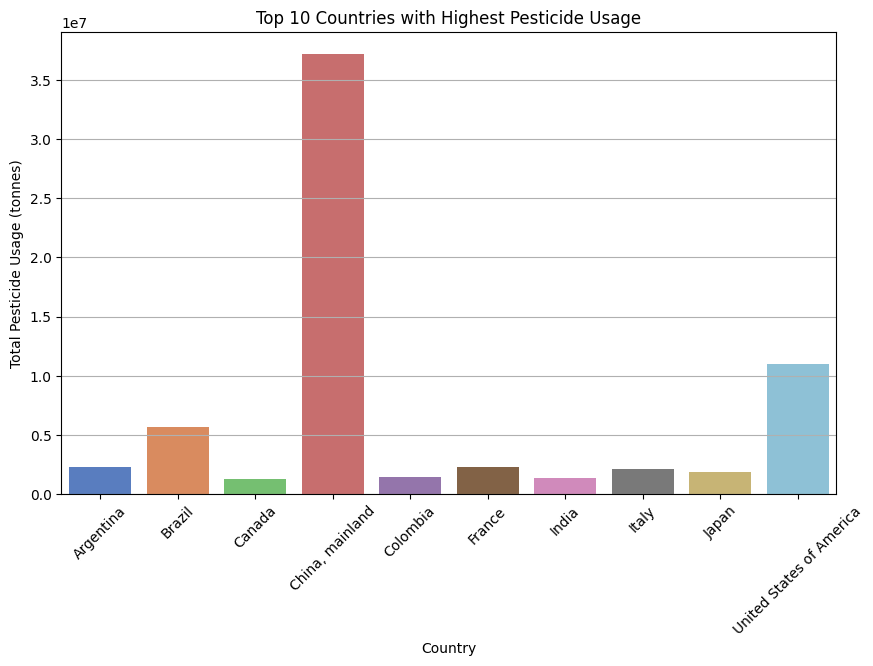

In [8]:
# Selecting 10 Countries:
top_10_countries = pesticides_df.groupby('Area')['Value'].sum().nlargest(10).index

# Filter the pesticides data for the top 10 countries
pesticides_top_10 = pesticides_df[pesticides_df['Area'].isin(top_10_countries)]

plt.figure(figsize=(10, 6))
sns.barplot(data=pesticides_top_10, x='Area', y='Value', estimator=sum, ci=None, palette='muted')
plt.title('Top 10 Countries with Highest Pesticide Usage')
plt.xlabel('Country')
plt.ylabel('Total Pesticide Usage (tonnes)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Average Rainfall Over Time:
This visualization illustrates the variation in average rainfall over time. It helps in identifying patterns or trends in rainfall, such as seasonal variations or long-term changes, which are crucial for agricultural planning and water resource management.

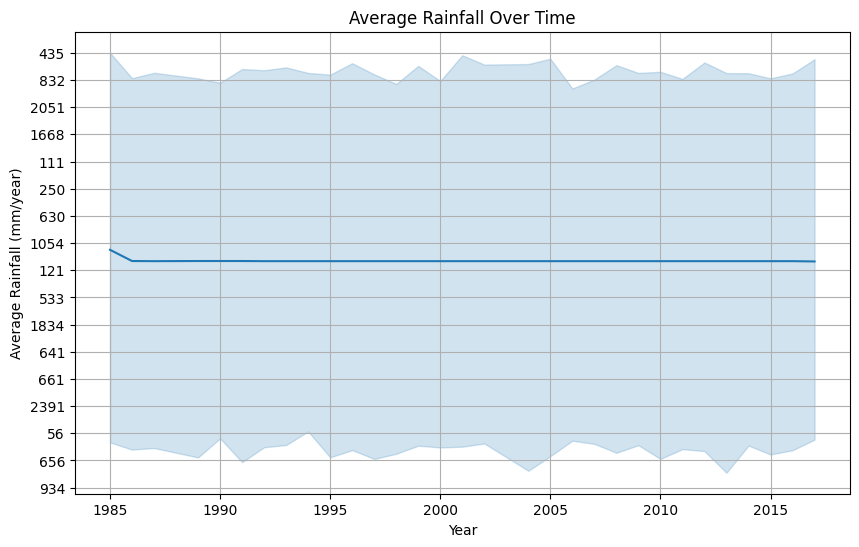

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=rainfall_df, x='Year', y='average_rain_fall_mm_per_year')
plt.title('Average Rainfall Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm/year)')
plt.grid(True)
plt.show()

### Temperature Distribution:
This histogram displays the distribution of average temperatures. It provides insights into the typical temperature ranges experienced, highlighting any skewness, central tendency, or spread in temperature data, which is valuable for understanding climate conditions.

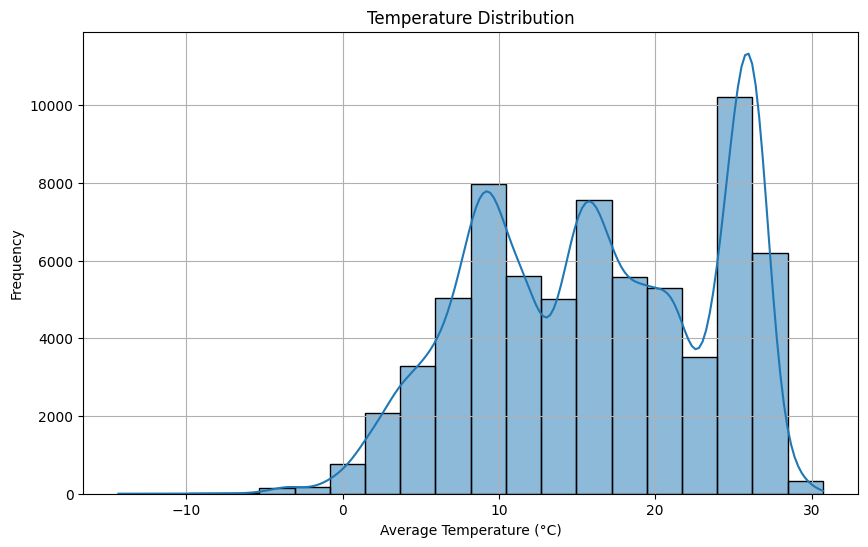

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(temp_df['avg_temp'].dropna(), bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Crop Yield Trends:
This plot visualizes the trends in crop yield over time. It enables the observation of changes in crop productivity, indicating the effectiveness of agricultural practices, environmental factors, or other influences on crop yield fluctuations over the years.

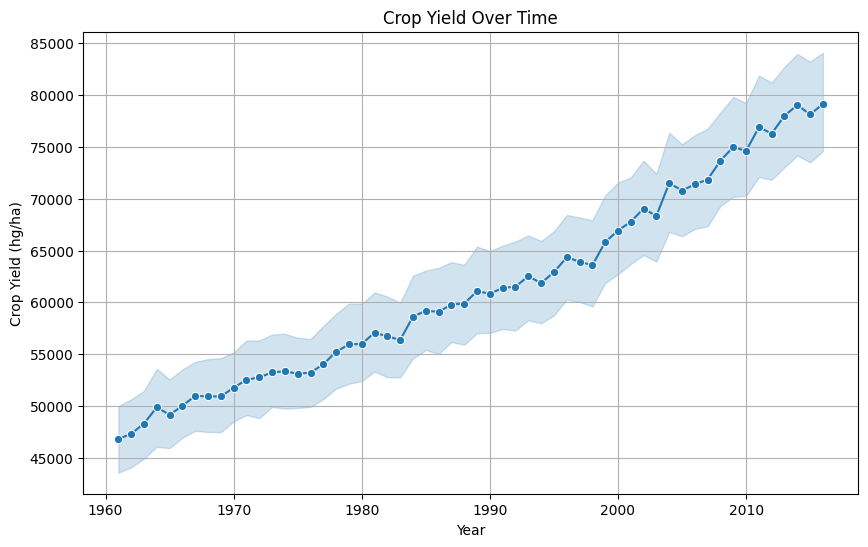

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yield_df, x='Year', y='Value', marker='o')
plt.title('Crop Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Crop Yield (hg/ha)')
plt.grid(True)
plt.show()

### Linear Regression Model

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

def perform_linear_regression():
    # Load datasets
    pesticides_df = pd.read_csv('pesticides.csv')
    rainfall_df = pd.read_csv('rainfall.csv')
    temp_df = pd.read_csv('temp.csv')
    yield_df = pd.read_csv('yield.csv')

    # Merge datasets based on 'Year' and 'Area'
    merged_df = pd.merge(pesticides_df, rainfall_df, on=['Year', 'Area'], how='inner')
    merged_df = pd.merge(merged_df, temp_df, left_on=['Year', 'Area'], right_on=['year', 'country'], how='inner')
    merged_df = pd.merge(merged_df, yield_df, left_on=['Year', 'Area'], right_on=['Year', 'Area'], how='inner')

    # Clean data
    merged_df.replace('..', np.nan, inplace=True)
    merged_df.dropna(inplace=True)

    # Encode categorical data
    label_encoder = LabelEncoder()
    merged_df['Area'] = label_encoder.fit_transform(merged_df['Area'])

   # Prepare features and target
    X = merged_df[['Year', 'Area', 'Value_x', 'average_rain_fall_mm_per_year', 'avg_temp']]
    X.columns = ['Year', 'Area', 'Pesticides', 'Rainfall', 'Temperature']
    y = merged_df['Value_y']


    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    import warnings
    warnings.filterwarnings('ignore')


    # Take user input for parameters
    while True:
        year = int(input("Enter the year: "))
        area = label_encoder.transform([input("Enter the area: ")])[0]
        pesticides = float(input("Enter the pesticides value: "))
        rainfall = float(input("Enter the average rainfall (mm/year): "))
        temperature = float(input("Enter the average temperature (°C): "))

        # Make prediction for user input
        prediction = model.predict([[year, area, pesticides, rainfall, temperature]])
        print("Prediction:", prediction[0])
        
        cont_input=input("do you want to continue?: (yes/no)")
        if cont_input.lower()!='yes':
            break

# Call the function to perform linear regression and make predictions
perform_linear_regression()

Enter the year:  1962
Enter the area:  India
Enter the pesticides value:  14785
Enter the average rainfall (mm/year):  85
Enter the average temperature (°C):  25


Prediction: 20379.564297161298


do you want to continue?: (yes/no) no
